In [ ]:
import pandas as pd
from pandas_datareader import data, wb
import datetime

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [ ]:
start = pd.to_datetime('2015-09-24')
end = pd.to_datetime('2020-09-24')
data_df = data.DataReader('AAPL','yahoo',start,end)
data_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-09-24,28.875000,28.092501,28.312500,28.750000,200878000.0,26.568277
2015-09-25,29.172501,28.504999,29.110001,28.677500,224607600.0,26.501280
2015-09-28,28.642500,28.110001,28.462500,28.110001,208436000.0,25.976849
2015-09-29,28.377501,26.965000,28.207500,27.264999,293461600.0,25.195972
2015-09-30,27.885000,27.182501,27.542500,27.575001,265892000.0,25.482449
...,...,...,...,...,...,...
2020-09-18,110.879997,106.089996,110.400002,106.839996,287104900.0,106.839996
2020-09-21,110.190002,103.099998,104.540001,110.080002,195713800.0,110.080002
2020-09-22,112.860001,109.160004,112.680000,111.809998,183055400.0,111.809998


In [ ]:
data1 = data_df.copy()
data1

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-09-24,28.875000,28.092501,28.312500,28.750000,200878000.0,26.568277
2015-09-25,29.172501,28.504999,29.110001,28.677500,224607600.0,26.501280
2015-09-28,28.642500,28.110001,28.462500,28.110001,208436000.0,25.976849
2015-09-29,28.377501,26.965000,28.207500,27.264999,293461600.0,25.195972
2015-09-30,27.885000,27.182501,27.542500,27.575001,265892000.0,25.482449
...,...,...,...,...,...,...
2020-09-18,110.879997,106.089996,110.400002,106.839996,287104900.0,106.839996
2020-09-21,110.190002,103.099998,104.540001,110.080002,195713800.0,110.080002
2020-09-22,112.860001,109.160004,112.680000,111.809998,183055400.0,111.809998


In [ ]:
data1 = data1.reset_index(level='Date')
data1

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-09-24,28.875000,28.092501,28.312500,28.750000,200878000.0,26.568277
1,2015-09-25,29.172501,28.504999,29.110001,28.677500,224607600.0,26.501280
2,2015-09-28,28.642500,28.110001,28.462500,28.110001,208436000.0,25.976849
3,2015-09-29,28.377501,26.965000,28.207500,27.264999,293461600.0,25.195972
4,2015-09-30,27.885000,27.182501,27.542500,27.575001,265892000.0,25.482449
...,...,...,...,...,...,...,...
1255,2020-09-18,110.879997,106.089996,110.400002,106.839996,287104900.0,106.839996
1256,2020-09-21,110.190002,103.099998,104.540001,110.080002,195713800.0,110.080002
1257,2020-09-22,112.860001,109.160004,112.680000,111.809998,183055400.0,111.809998
1258,2020-09-23,112.110001,106.769997,111.620003,107.120003,150718700.0,107.120003


In [ ]:
data1.shape[0]

1260

In [ ]:
plot1 = pd.DataFrame(data1,columns=['Date','High','Low','Open','Close'])
plot1

,Date,High,Low,Open,Close
0,2015-09-24,28.875000,28.092501,28.312500,28.750000
1,2015-09-25,29.172501,28.504999,29.110001,28.677500
2,2015-09-28,28.642500,28.110001,28.462500,28.110001
3,2015-09-29,28.377501,26.965000,28.207500,27.264999
4,2015-09-30,27.885000,27.182501,27.542500,27.575001
...,...,...,...,...,...
1255,2020-09-18,110.879997,106.089996,110.400002,106.839996
1256,2020-09-21,110.190002,103.099998,104.540001,110.080002
1257,2020-09-22,112.860001,109.160004,112.680000,111.809998
1258,2020-09-23,112.110001,106.769997,111.620003,107.120003


In [ ]:
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
%matplotlib inline

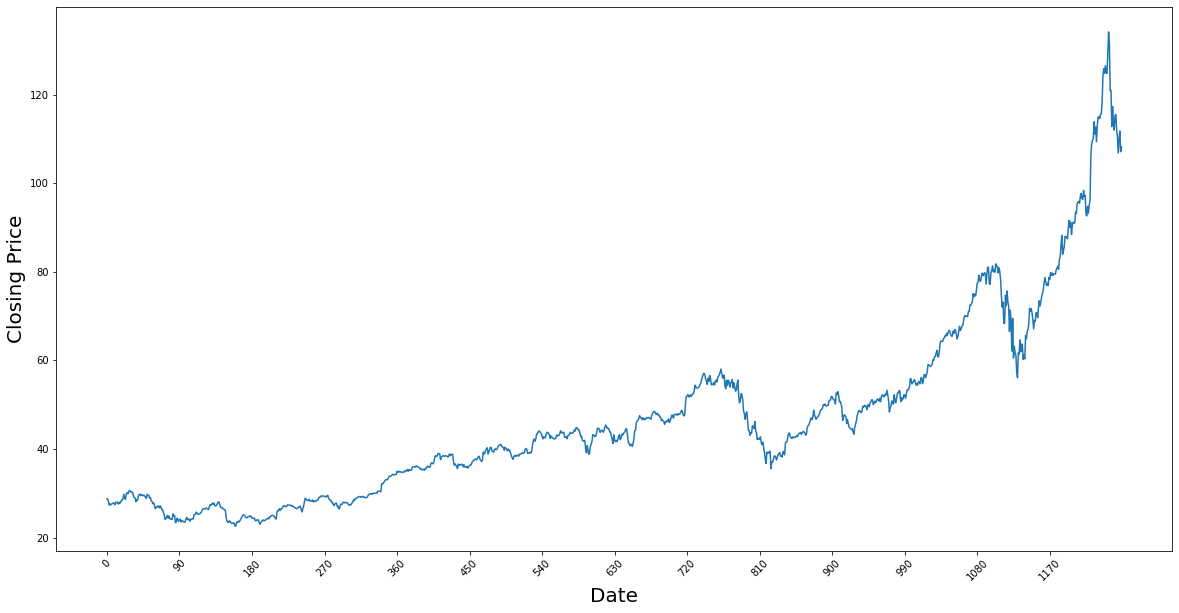

In [ ]:

figure = plt.figure(figsize=(20,10))
plt.plot(range(data1.shape[0]),(data1['Close']))
plt.xticks(range(0,data1.shape[0],90),data1['Date'].loc[::90],rotation=45)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Closing Price',fontsize=20)
plt.show()
figure.savefig("abc.png")

In [ ]:
#Data Preprocessing
data1['Date'] = data1.index
data2 = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
data2['Date'] = data1['Date']
data2['Open'] = data1['Open']
data2['High'] = data1['High']
data2['Low'] = data1['Low']
data2['Close'] = data1['Close']
train_set = data2.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(60, 1260):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 15, batch_size = 32)

Epoch 1/15
38/38 [==============================] - 1s 14ms/step - loss: 0.0146
Epoch 2/15
38/38 [==============================] - 0s 13ms/step - loss: 0.0029
Epoch 3/15
38/38 [==============================] - 0s 13ms/step - loss: 0.0025
Epoch 4/15
38/38 [==============================] - 0s 13ms/step - loss: 0.0018
Epoch 5/15
38/38 [==============================] - 0s 13ms/step - loss: 0.0021
Epoch 6/15
38/38 [==============================] - 1s 13ms/step - loss: 0.0021
Epoch 7/15
38/38 [==============================] - 0s 13ms/step - loss: 0.0017
Epoch 8/15
38/38 [==============================] - 0s 13ms/step - loss: 0.0016
Epoch 9/15
38/38 [==============================] - 0s 13ms/step - loss: 0.0016
Epoch 10/15
38/38 [==============================] - 1s 14ms/step - loss: 0.0016
Epoch 11/15
38/38 [==============================] - 0s 13ms/step - loss: 0.0014
Epoch 12/15
38/38 [==============================] - 1s 14ms/step - loss: 0.0017
Epoch 13/15
38/38 [==================

In [ ]:
testdataframe = data1
testdataframe['Date'] = testdataframe.index
testdata = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
testdata['Date'] = testdataframe['Date']
testdata['Open'] = testdataframe['Open']
testdata['High'] = testdataframe['High']
testdata['Low'] = testdataframe['Low']
testdata['Close'] = testdataframe['Close']
real_stock_price = testdata.iloc[:, 1:2].values
dataset_total = pd.concat((data2['Open'], testdata['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 1260):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

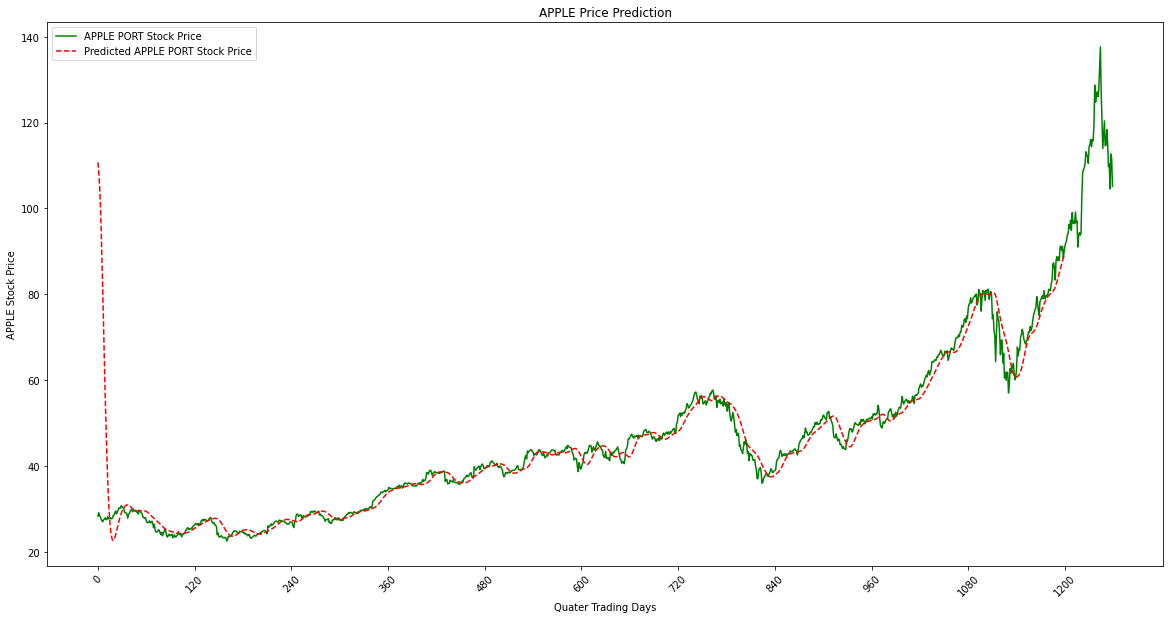

In [ ]:

figure1 = plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'APPLE PORT Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted APPLE PORT Stock Price',linestyle='dashed')
plt.xticks(range(0,testdata.shape[0],120),testdata['Date'].loc[::120],rotation=45)
plt.title('APPLE Price Prediction')
plt.xlabel('Quater Trading Days')
plt.ylabel('APPLE Stock Price')
plt.legend()
plt.show()
figure1.savefig("final.png")


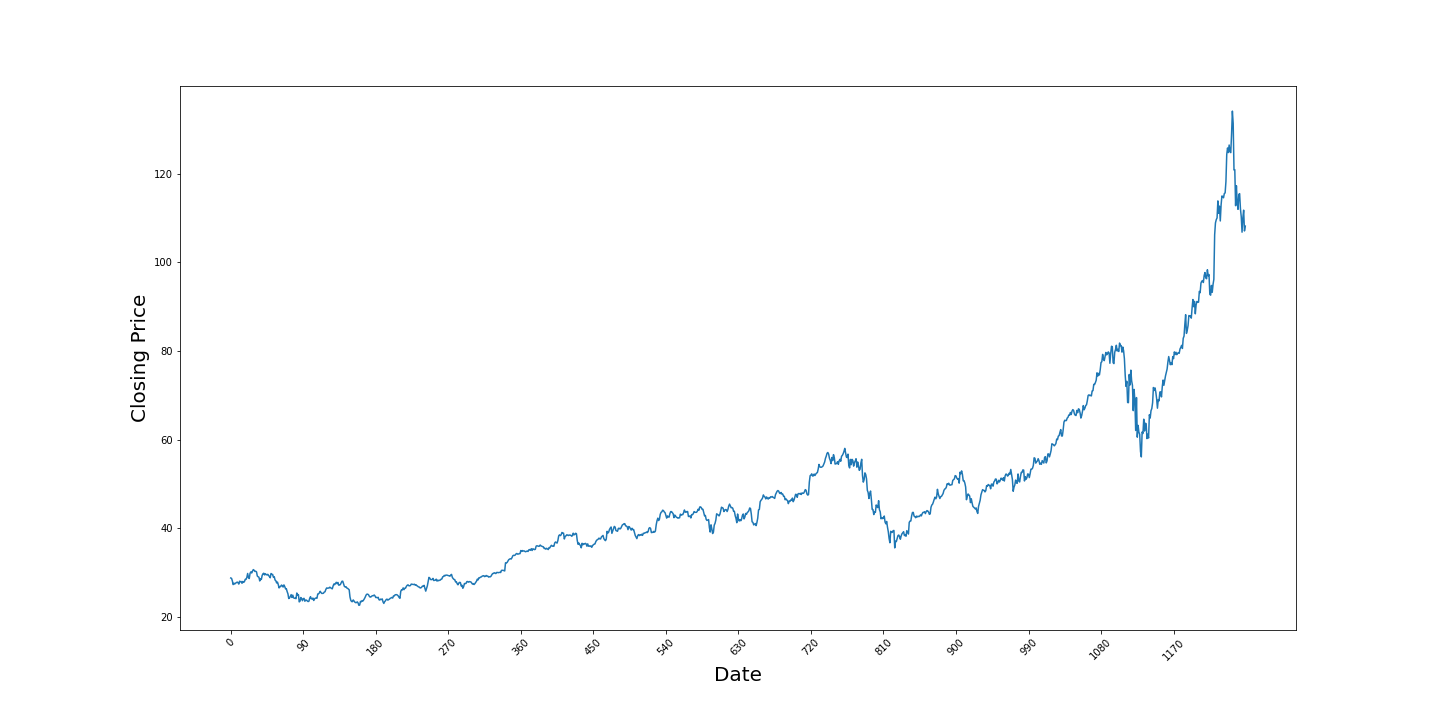

In [ ]:
from IPython.display import Image
Image('abc.png')

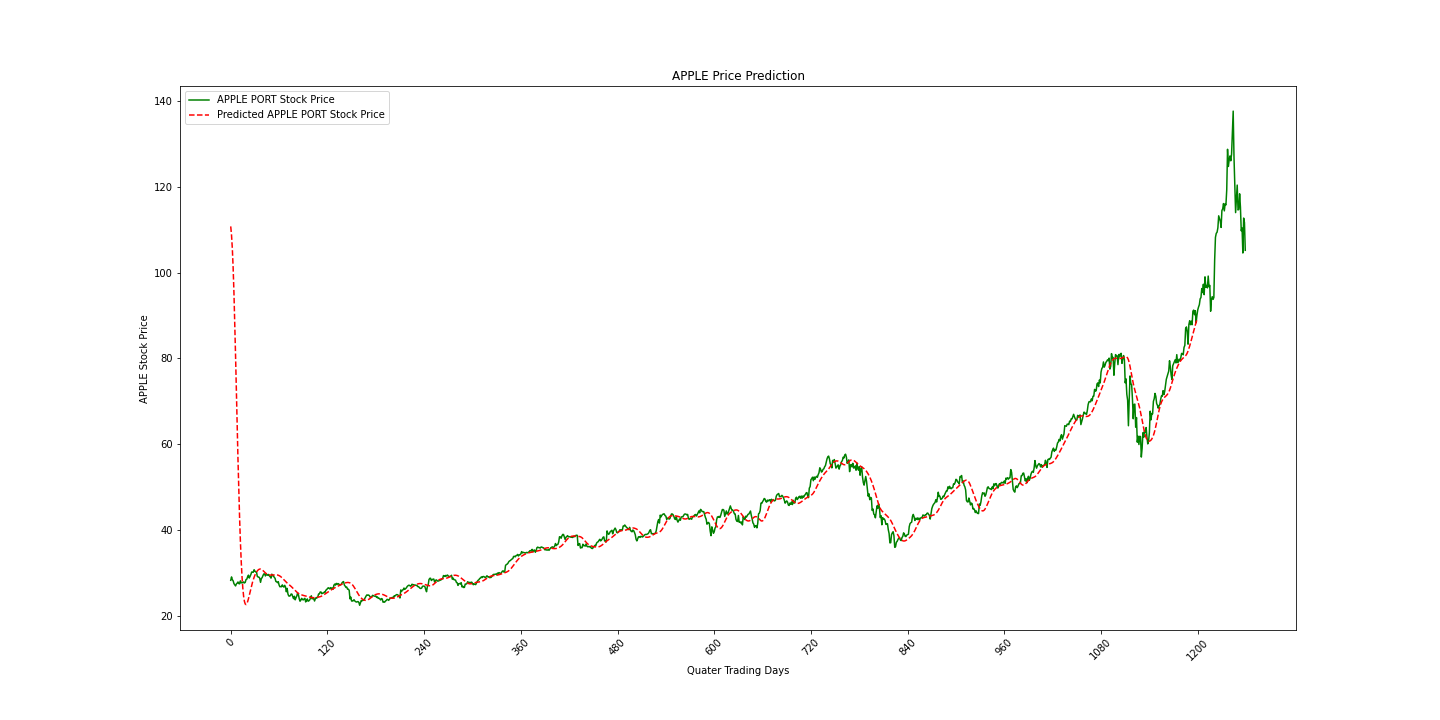

In [ ]:
from IPython.display import Image
Image('final.png')